In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=4.76s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [43367] (ann_id [540174])
1. upper person in brown
2. top left guy
3. brown coat
[239.72, 202.47, 206.29, 170.96, 210.11, 154.72, 222.53, 136.57, 162.36, 118.43, 155.67, 104.1, 151.85, 40.11, 180.51, 2.87, 267.42, 0.96, 300.84, 30.56, 316.12, 63.99, 297.98, 91.69, 317.08, 129.89, 300.84, 175.73, 275.06, 183.37, 271.24, 171.91, 282.7, 151.85, 268.37, 135.62, 253.09, 137.53, 253.09, 170.0, 259.78, 189.1, 248.31, 210.11]


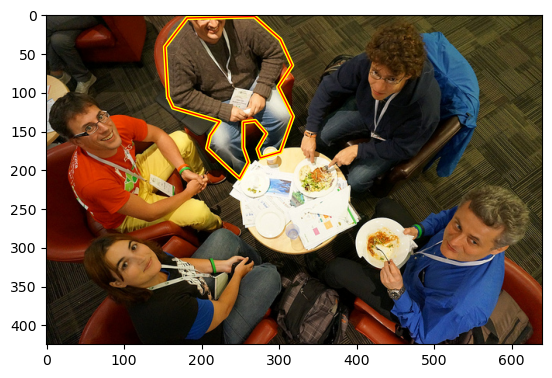

In [4]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. lady in purple
2. woman in purple dress
3. woman in pink


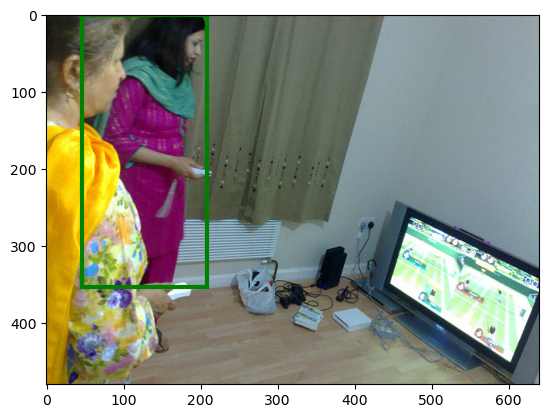

{'sent_ids': [122352, 122353, 122354], 'file_name': 'COCO_train2014_000000079783_1.jpg', 'ann_id': 183898, 'ref_id': 43039, 'image_id': 79783, 'split': 'train', 'sentences': [{'tokens': ['lady', 'in', 'purple'], 'raw': 'lady in purple', 'sent_id': 122352, 'sent': 'lady in purple'}, {'tokens': ['woman', 'in', 'purple', 'dress'], 'raw': 'woman in purple dress', 'sent_id': 122353, 'sent': 'woman in purple dress'}, {'tokens': ['woman', 'in', 'pink'], 'raw': 'woman in pink', 'sent_id': 122354, 'sent': 'woman in pink'}], 'category_id': 1}


In [5]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()
print(ref)

In [6]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[122352]: lady in purple
sent_id[122353]: woman in purple dress
sent_id[122354]: woman in pink
